<ipython-input-1-3892274c21da>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


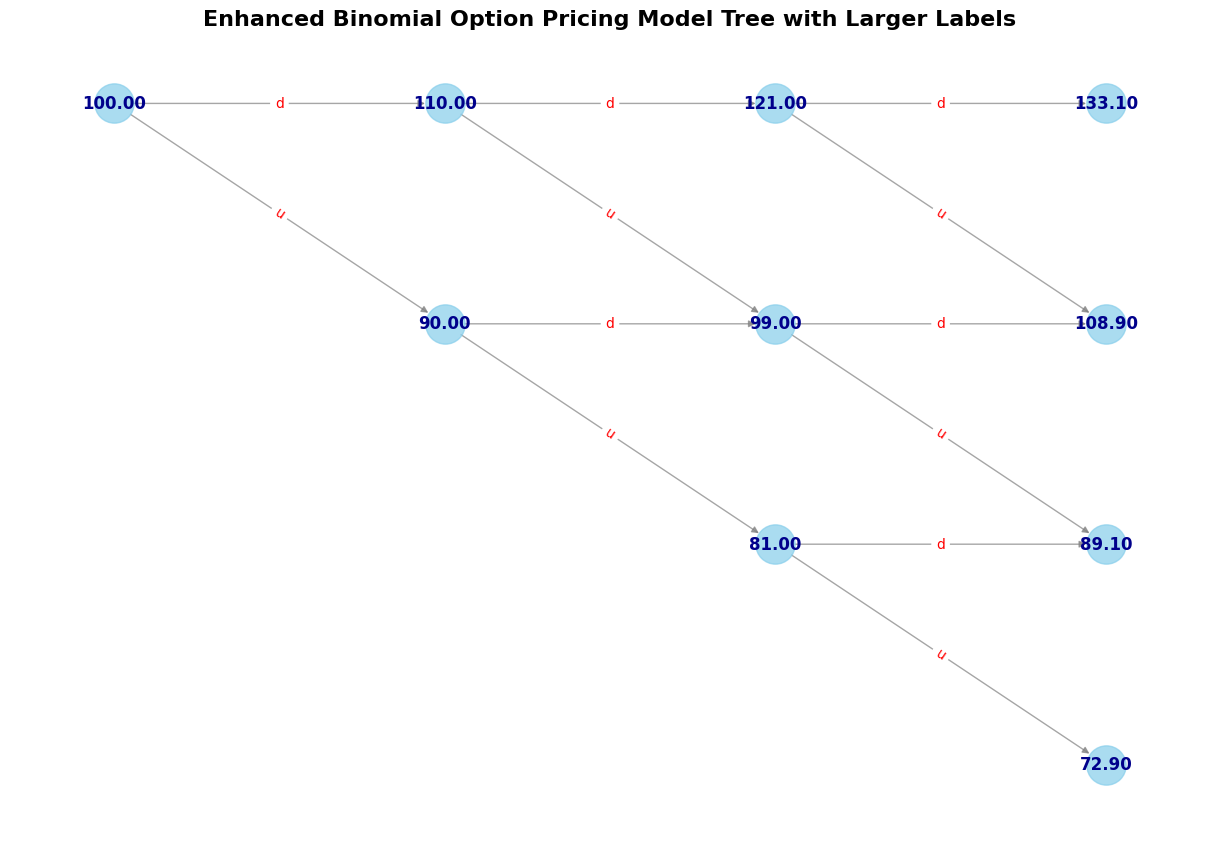

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
S0 = 100  # initial stock price
u = 1.1   # up factor
d = 0.9   # down factor
r = 0.05  # risk-free interest rate per period
T = 3     # number of periods

# Create the binomial tree for stock prices
def create_stock_price_tree(S0, u, d, T):
    tree = [[S0]]
    for t in range(1, T + 1):
        prices = [tree[t - 1][i] * u if i == 0 else tree[t - 1][i - 1] * d for i in range(t + 1)]
        tree.append(prices)
    return tree

# Generate stock price tree
stock_tree = create_stock_price_tree(S0, u, d, T)

# Create a directed graph for visualization
G = nx.DiGraph()
pos = {}  # Dictionary to store positions for nodes

# Populate the graph and positions
for t in range(len(stock_tree)):
    for i, price in enumerate(stock_tree[t]):
        node = f'{t}-{i}'
        pos[node] = (t, -i)  # Position based on time and level
        G.add_node(node, price=price)
        if t > 0:
            # Connect to nodes from the previous time step
            if i < len(stock_tree[t - 1]):
                G.add_edge(f'{t - 1}-{i}', node)
            if i > 0:
                G.add_edge(f'{t - 1}-{i - 1}', node)

# Visualize the enhanced binomial tree
plt.figure(figsize=(12, 8))

# Draw the graph with enhanced aesthetics
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=800,
    node_color="skyblue",
    edge_color="gray",
    alpha=0.7,
    linewidths=1
)

# Add larger labels to nodes with prices
labels = {node: f"{G.nodes[node]['price']:.2f}" for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="darkblue", font_weight="bold")

# Add edge labels to show transitions
edge_labels = {
    (u, v): f"{'u' if pos[v][1] < pos[u][1] else 'd'}"
    for u, v in G.edges
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")

# Add a title and improve spacing
plt.title("Enhanced Binomial Option Pricing Model Tree with Larger Labels", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
